In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("../datasets/final/HCLTECH.csv")

In [3]:
df.shape

(102, 84)

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.set_index(df.columns[0], inplace=True)

In [6]:
# df = df.T

In [7]:
df

,4-Mar,4-Jun,4-Sep,4-Dec,5-Mar,5-Jun,5-Sep,5-Dec,6-Mar,6-Jun,...,22-Mar,22-Jun,22-Sep,22-Dec,23-Mar,23-Jun,23-Sep,23-Dec,24-Mar,24-Jun
HCLTECH,,,,,,,,,,,,,,,,,,,,,
Close,30.962500,37.312500,44.525002,42.994999,46.562500,48.687500,56.907501,67.387497,81.775002,63.082500,...,1163.75,973.25,932.349976,1039.300049,1085.25,1187.949951,1234.800049,1466.099976,1543.550049,1459.599976
Equity Share Capital,59.220000,59.220000,59.220000,59.220000,63.840000,63.840000,63.840000,63.840000,64.690000,64.690000,...,543.00,543.00,543.000000,543.000000,543.00,543.000000,543.000000,543.000000,543.000000,543.000000
Total Share Capital,59.220000,59.220000,59.220000,59.220000,63.840000,63.840000,63.840000,63.840000,64.690000,64.690000,...,543.00,543.00,543.000000,543.000000,543.00,543.000000,543.000000,543.000000,543.000000,543.000000
Reserves and Surplus,2231.960000,2231.960000,2231.960000,2231.960000,2796.140000,2796.140000,2796.140000,2796.140000,2511.180000,2511.180000,...,42048.00,42048.00,42048.000000,42048.000000,40561.00,40561.000000,40561.000000,40561.000000,38927.000000,38927.000000
Total Reserves and Surplus,2231.960000,2231.960000,2231.960000,2231.960000,2796.140000,2796.140000,2796.140000,2796.140000,2511.180000,2511.180000,...,42048.00,42048.00,42048.000000,42048.000000,40561.00,40561.000000,40561.000000,40561.000000,38927.000000,38927.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P/L Before Tax,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,...,3472.00,3488.00,3544.000000,4125.000000,3559.00,3409.000000,3950.000000,4391.000000,3706.000000,3401.000000
Tax,0.020000,6.340000,4.460000,2.520000,2.930000,-0.250000,3.140000,6.930000,-1.000000,6.380000,...,469.00,810.00,803.000000,929.000000,715.00,813.000000,984.000000,1042.000000,943.000000,922.000000
P/L After Tax from Ordinary Activities,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,...,3003.00,2678.00,2741.000000,3196.000000,2844.00,2596.000000,2966.000000,3349.000000,2763.000000,2479.000000


In [8]:
closing_prices = df.iloc[0, 1:].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [9]:
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 9
X, y = create_sequences(closing_prices_scaled, look_back)

In [10]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 9s 2s/step - loss: 0.0476 - val_loss: 0.5123
Epoch 2/50
2/2 [==============================] - 0s 74ms/step - loss: 0.0301 - val_loss: 0.3879
Epoch 3/50
2/2 [==============================] - 0s 66ms/step - loss: 0.0177 - val_loss: 0.2775
Epoch 4/50
2/2 [==============================] - 0s 93ms/step - loss: 0.0120 - val_loss: 0.1818
Epoch 5/50
2/2 [==============================] - 0s 74ms/step - loss: 0.0094 - val_loss: 0.1158
Epoch 6/50
2/2 [==============================] - 0s 65ms/step - loss: 0.0104 - val_loss: 0.0874
Epoch 7/50
2/2 [==============================] - 0s 66ms/step - loss: 0.0103 - val_loss: 0.0859
Epoch 8/50
2/2 [==============================] - 0s 172ms/step - loss: 0.0085 - val_loss: 0.0960
Epoch 9/50
2/2 [==============================] - 0s 66ms/step - loss: 0.0063 - val_loss: 0.1077
Epoch 10/50
2/2 [==============================] - 0s 140ms/step - loss: 0.0052 - val_loss: 0.1140
Epoch 11/50
2/2 [============

In [14]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 63ms/step


In [15]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [16]:
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [17]:
full_closing_prices = scaler.inverse_transform(closing_prices_scaled)
all_predictions = np.concatenate([train_predictions, test_predictions], axis=0)

In [18]:
future_predictions = []
last_sequence = closing_prices_scaled[-look_back:]

In [19]:
num_future_predictions = 4
for _ in range(num_future_predictions):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(look_back, 1)

1/1 [==============================] - 0s 51ms/step


In [20]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [21]:
extended_predictions = np.concatenate([all_predictions, future_predictions])

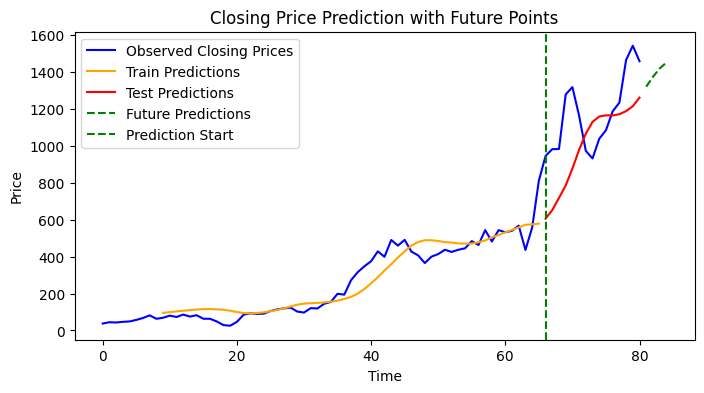

In [22]:
plt.figure(figsize=(8,4))
plt.plot(full_closing_prices, color='blue', label='Observed Closing Prices')
plt.plot(np.arange(look_back, look_back + len(train_predictions)), train_predictions, color='orange', label='Train Predictions')
plt.plot(np.arange(look_back + len(train_predictions), look_back + len(train_predictions) + len(test_predictions)), test_predictions, color='red', label='Test Predictions')
plt.plot(np.arange(len(full_closing_prices), len(full_closing_prices) + num_future_predictions), future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.axvline(x=len(full_closing_prices) - len(test_predictions), color='green', linestyle='--', label='Prediction Start')
plt.title('Closing Price Prediction with Future Points')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
mae = mean_absolute_error(y_test_scaled, test_predictions)
mse = mean_squared_error(y_test_scaled, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_scaled - test_predictions) / y_test_scaled)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 229.07814543651043
Mean Squared Error (MSE): 70978.00376611897
Root Mean Squared Error (RMSE): 266.41697349478125
Mean Absolute Percentage Error (MAPE): 19.66662707937177%
